In [ ]:
# importing the required libraries

import numpy as np
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing the collected data

# data1 = pd.read_csv('SOCR-HeightWeight.csv')
data2 = pd.read_csv('Features.csv')


In [ ]:
data2.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
4,0e7ipj03S05BNilyu5bRzt,Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585


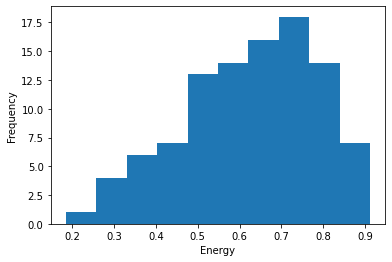

In [ ]:
freq = [0]*10
energy=data2['energy']                                              #Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks
x_axis = [str(i/10) for i in range(10)]

for i in range(100):
  freq[int(energy[i]*10)] = freq[int(energy[i]*10)] + 1     
energy.plot(kind="hist")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

## MOM

Now we use MOM ( same for MLE) to fit normal distribution to the above data.

*  $E[X] = μ = \frac{1}{n}\Sigma x_i$ (Sample Mean)

*  $E[X^2] = \mu^2 + \sigma^2 = \frac{1}{n}Σ x_i^2$

where, 
* $x_i$ are i.i.d realized values of X
* $Y ∼$ 𝓝$( μ, σ)$ is the normal distribution that fits the sample data.

In [ ]:
mean = energy.mean()
mom_2 = np.mean([i*i for i in energy])                                          # This is second moment = mean^2 + std^2
var=np.var(energy)                                                              # This is var = second moment - first moment
std = math.sqrt(var)                                                            # This is std = (var)^1/2
print("The Mean (as well as first moment) of the data is: " , mean)             
print("The Mean (as well as second moment) of the data is: " , str(mom_2))             
print("The Variance of the data is: " , str(var))
print("The Standard Deviation of the data is: "+ str(std))


The Mean (as well as first moment) of the data is:  0.6255
The Mean (as well as second moment) of the data is:  0.41660846
The Variance of the data is:  0.02535821
The Standard Deviation of the data is: 0.15924261364345915


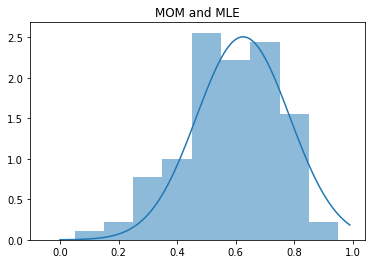

In [ ]:
X_axis = [i/100 for i in range(100)]
x_axis = [i/10 for i in range(10)]
plt.plot(X_axis,st.norm.pdf(X_axis,mean,math.sqrt(var)))
plt.bar(x_axis,[(10*i)/90 for i in freq],width = 0.1,alpha = 0.5)
plt.title("MOM and MLE")
plt.show()

#  Beta Binomial 

## Prior Distribution

First we fit a beta distribution to out give sample data which is prior distribution.

$X \sim beta(α,β)$ 

where,

* $mean = \frac{α}{\alpha + \beta}$
* $var = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$

In [ ]:
priorData = []
balance = data2['energy']
mean = np.mean(balance)  
print(mean)
print(data2.shape)
n = 7
for i in range (0,int (100/n)):
  y=0
  for z in range (0,n):
    y+=(0.6< data2['energy'][n*i + z]) 
    priorData.append(y/n)
prior = pd.DataFrame(priorData)

0.6255
(100, 14)


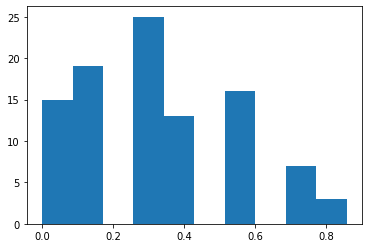

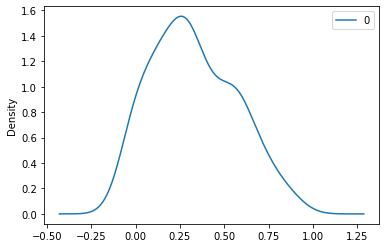

In [ ]:
plt.hist(priorData)
pd.DataFrame(priorData).plot(kind='kde')

plt.show()


In [ ]:
alpha = ((1-mean)/var - 1/mean)*pow(mean,2)
print("alpha = "+str(alpha))

beta = alpha*(1/mean - 1)
print("beta = "+str(beta))

prior = st.beta(alpha,beta)

alpha = 5.152637282757734
beta = 3.0849922660156226


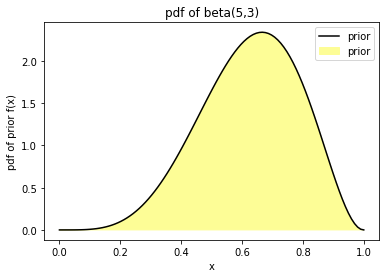

In [ ]:
x_axis = np.linspace(0,1,100)

plt.plot(x_axis,prior.pdf(x_axis),color= 'black',label="prior")
plt.fill(x_axis,prior.pdf(x_axis),color= '#FDFD96',label="prior")
plt.ylabel("pdf of prior f(x)")
plt.xlabel("x")
plt.title("pdf of beta("+str(int(alpha))+","+str(int(beta))+")")
plt.legend()
plt.show()

## Likelihood Distribution

Now we use the maximum likelihood funtion. In this scenario it follows binomial distribution.

<center> $L \mid π \sim Bin(n,π)$ </center>

Where, 
* n : Number of people tested
* π : Probability of a songs having more energy than mean

In [ ]:
# Size of data
n = len(priorData)

# Realized value of proportion of energy
y = int(sum(priorData))
p = y/n

print("n = "+str(n))
print("y = "+str(y))
print("p = "+str(p))

likelihood = st.binom(n,p)

n = 98
y = 32
p = 0.32653061224489793


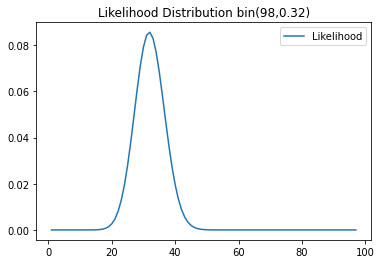

In [ ]:
r_values = [i for i in range(1,n)]
# list of pmf values
dist = [st.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.plot(r_values, dist, label = "Likelihood")
plt.title("Likelihood Distribution bin("+str(n)+","+str(int(100*p)/100)+")")
plt.legend()
plt.show()

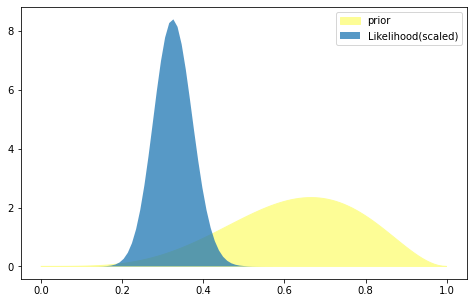

In [ ]:
## combined plot
plt.figure(figsize = (8,5))
plt.fill(x_axis,prior.pdf(x_axis),color = '#FDFD96',label = "prior",alpha = 1)
plt.fill([i/n for i in r_values], [i*n for i in dist], label = "Likelihood(scaled)",alpha=0.75)
# plt.title("Likelihood Distribution bin(11698,0.13)")
plt.legend()
plt.show()

In [ ]:
print("Likelihood mean = " + str(p))
print("Prior mean = " + str(mean))

Likelihood mean = 0.32653061224489793
Prior mean = 0.6255


## Posterior Distribution

<center> $\pi \mid L = y \sim beta(\alpha', \beta')$ </center>

where,

* $\alpha' = \alpha + y$
* $\beta' =  \beta + n - y$
* $y$ is the realized value of number of songs which have more energy in $n$ set

In [ ]:
post_alpha = alpha + y
post_beta = beta + n - y
post_mean = post_alpha/(post_alpha+post_beta)
print("posterior alpha = "+str(post_alpha))
print("posterior beta = "+str(post_beta))

posterior = st.beta(post_alpha,post_beta)
print("Posterior mean = "+str(post_mean))

posterior alpha = 37.15263728275774
posterior beta = 69.08499226601562
Posterior mean = 0.34971259656825343


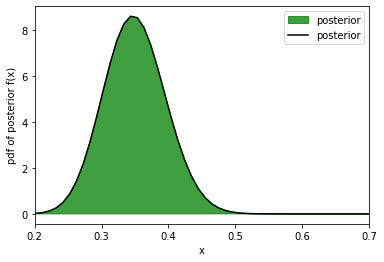

In [ ]:
plt.fill(x_axis,posterior.pdf(x_axis),color= 'g',label="posterior",alpha = 0.75)
plt.plot(x_axis,posterior.pdf(x_axis),color= 'black',label="posterior")
plt.ylabel("pdf of posterior f(x)")
plt.xlabel("x")
plt.xlim(0.2,0.7)
plt.legend()
plt.show()

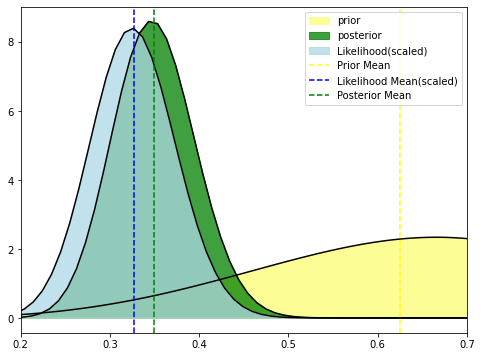

In [ ]:
## combined plot
plt.figure(figsize = (8,6))
plt.fill(x_axis,prior.pdf(x_axis),color = '#FDFD96',label = "prior")
plt.fill(x_axis,posterior.pdf(x_axis),color= 'g',label="posterior",alpha = 0.75)
plt.fill([i/n for i in r_values], [i*n for i in dist],color = "#add8e6", label = "Likelihood(scaled)",alpha = 0.75)
plt.plot(x_axis,posterior.pdf(x_axis),color= 'black')
plt.plot(x_axis,prior.pdf(x_axis),color= 'black')
plt.plot([i/n for i in r_values], [i*n for i in dist],color = "black")
plt.axvline(x = mean, color = '#FFFF14',linestyle = 'dashed',label = 'Prior Mean')
plt.axvline(x = p,color = 'b',linestyle = 'dashed',label = 'Likelihood Mean(scaled)')
plt.axvline(x = post_mean,color = 'g',linestyle = 'dashed',label = 'Posterior Mean')
plt.xlim(0.2,0.7)
plt.legend()
plt.show()

In [ ]:
[(post_mean-2*math.sqrt(0.000843311793395))*100,(post_mean+2*math.sqrt(0.000843311793395))*100]

[29.163293426224477, 40.77922588742621]

In [ ]:
[(mean-2*std)*100, (mean+2*std)*100]

[30.701477271308164, 94.39852272869183]